In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt("MultiVarLR (1).csv",delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [ ]:
X = data[:,0:3]
X
y = data[:,-1:]
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [ ]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [ ]:
def plot_thetas(loss, theta, i):
    plt.plot(theta, loss, '.-')
    plt.xlabel("Theta" + i)
    plt.ylabel("Loss")
    plt.show()

# Task 1:
## Implement the Adam (Mini-Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [ ]:

def miniBatch_adam(X, y, alpha, epsilon, beta1, beta2, itr, batchSize):

    #X = np.concatenate((np.ones(len(X)).reshape(len(X),1), X), axis=1)
    loss = []
    epoch_cost = []
    all_thetas = []
    batchNum = int(len(X)/batchSize)

    thetas = np.zeros((4,1))
    v = np.zeros((4,1))
    m = np.zeros((4,1))

    for i in range(itr):
        for j in range(batchNum):

            X_b = X[j * batchSize : (j+1)*batchSize]
            y_b = y[j * batchSize : (j+1)*batchSize]
            
            
            h = X_b@thetas
            e = (h - y_b)
            j_cost = (1/2*len(X_b))*np.vdot(e,e)

            loss.append(j_cost)
            
            # Gradient calculation
            gradient_vec = (1/len(X_b))*(X_b.T @ e)
            norm = np.linalg.norm(gradient_vec)
            
            #Update thetas

            m = beta1*m + (1-beta1)*gradient_vec
            v = beta2*v + (1-beta2)*np.square(gradient_vec)
            

            #correction
            m_hat = m/(1-beta1**(i+1))
            v_hat = v/(1-beta2**(i+1))
            
            all_thetas.append(thetas)
            thetas = thetas - (alpha*m_hat / (np.sqrt(v_hat + epsilon)))

        epoch_cost.append(j_cost)
        
        #update using epoch 
        if((i > 0 ) and (abs(epoch_cost[(i-1)] - epoch_cost[i]) <= 0.001)):
            return loss, thetas, all_thetas, epoch_cost
        elif (norm <= 0.001): 
            return loss, thetas, all_thetas, epoch_cost
        elif (i == itr-1):
            
            return loss, thetas, all_thetas, epoch_cost


In [ ]:
X = data[:,0:3]
y = data[:,-1:]

In [ ]:
X = np.concatenate((np.ones(len(X)).reshape(len(X),1), X), axis=1)
loss, thetas, all_thetas, i = miniBatch_adam(X=X, y=y, alpha=0.005, epsilon=0.00000001, beta1=0.2, beta2=0.7, itr=500, batchSize=5)

In [ ]:
y_pred= X@thetas
print("r2 = ", r2_score(y,y_pred))

r2 =  0.9862183481192022


In [ ]:
thetas = np.array(all_thetas).squeeze()
thetas.shape

(2500, 4)

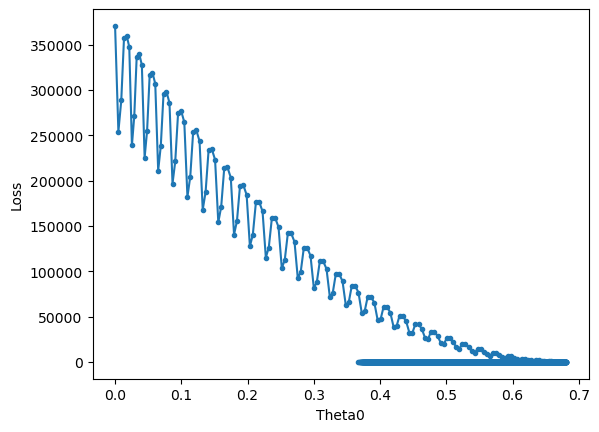

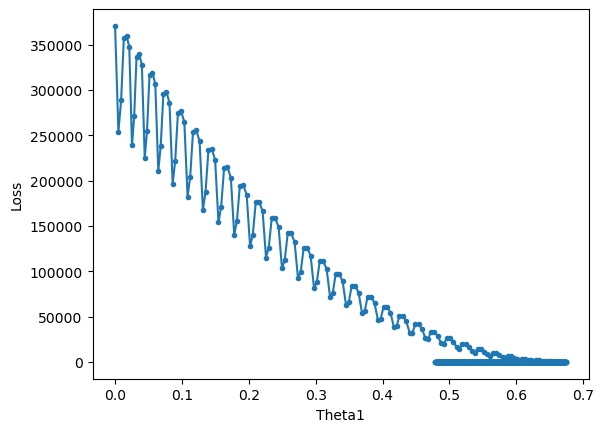

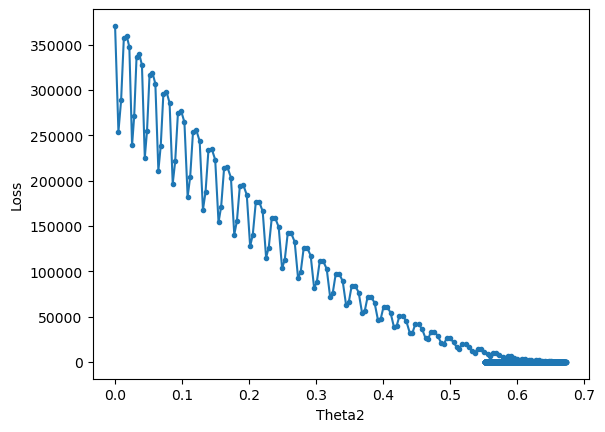

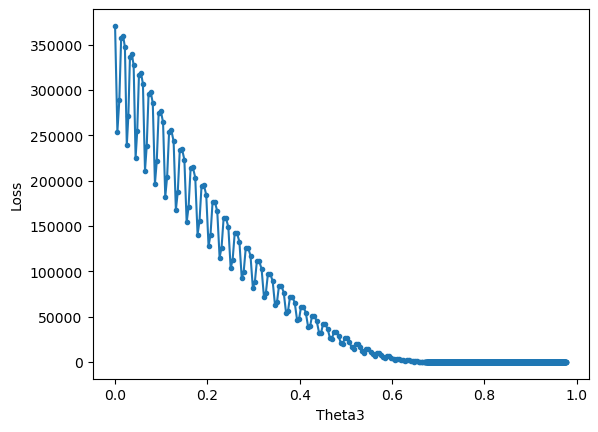

In [ ]:
for i in range(thetas.shape[1]):
    plot_thetas(loss, thetas[:,i], str(i))

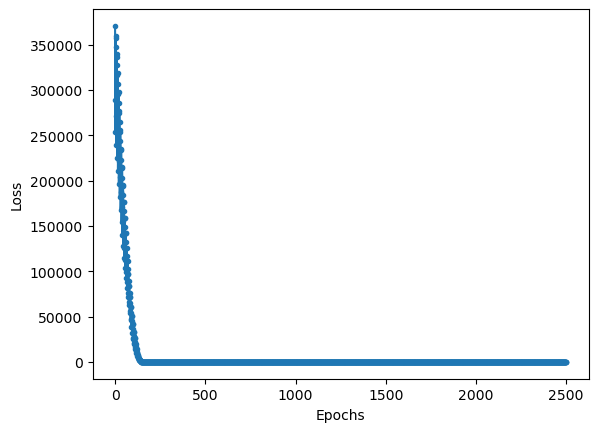

In [ ]:
plt.plot(loss, '.-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

![WhatsApp Image 2023-04-07 at 4.17.18 PM.jpeg](attachment:56317bd8-2f9d-4635-a37d-7bd9ab7da9b6.jpeg)

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [ ]:
def gd(X, y, theta):
    
    h = X@theta
    e = (h - y)
    j_cost = (1/2*len(X))*np.vdot(e,e)
    gradient_vec = (1/len(X))*(X.T @ e)
    
    return gradient_vec
            

In [ ]:

def multivariate_BFGS(X, y, alpha, itr, batchSize):

    loss = []
    all_thetas = []
    epoch_cost = []
    batchNum = int(len(X)/batchSize)
    
    I = np.identity(4)
    B = I
    
    theta0 = np.zeros((4,1))
    theta1 = np.full((4,1), 0.001)
    
    for i in range(itr):
        for j in range(batchNum):

            X_b = X[j * batchSize : (j+1)*batchSize]
            y_b = y[j * batchSize : (j+1)*batchSize]

            xdiff = theta1 - theta0

            y0 = gd(X_b, y_b, theta0)
            y1 = gd(X_b, y_b, theta1)
            
            ydiff = y1 - y0

            part1 = I - ((xdiff@ydiff.T)/(ydiff.T@xdiff + 1e-8))
            part2 = I - (ydiff@xdiff.T)/(ydiff.T@xdiff + 1e-8)
            
            B = part1@B@part2 + (xdiff@xdiff.T)/(ydiff.T@xdiff+1e-8)
            
            theta0 = theta1
            theta1 = theta1 - alpha*(B@y1)
           
            all_thetas.append(theta1)
            
            # calculate loss
            h = X_b@theta1
            e = (h - y_b)
            j_cost = (1/2*len(X_b))*np.vdot(e,e)
            loss.append(j_cost)
            
            # Gradient calculation
            gradient_vec = (1/len(X_b))*(X_b.T @ e)
            norm = np.linalg.norm(gradient_vec)
            
            
        epoch_cost.append(j_cost)
        
        if((i > 0 ) and (abs(epoch_cost[(i-1)] - epoch_cost[i]) <= 0.001)):
            return loss, theta1, all_thetas, epoch_cost, i
        elif (norm <= 0.001): 
            return loss, theta1, all_thetas, epoch_cost, i
        elif (i == itr-1):
            return loss, theta1, all_thetas, epoch_cost, i
           


In [ ]:
X = data[:,0:3]
y = data[:,-1:]

In [ ]:
X = np.concatenate((np.ones(len(X)).reshape(len(X),1), X), axis=1)
loss, theta1, all_thetas, cost, i = multivariate_BFGS(X=X, y=y, alpha=0.5, itr=500, batchSize=5)

In [ ]:
y_pred= X@theta1
print("r2 = ", r2_score(y,y_pred))

r2 =  0.9851620766635755


In [ ]:
thetas = np.array(all_thetas).squeeze()

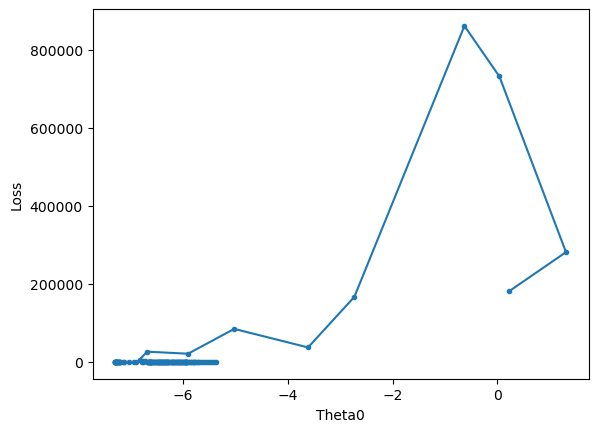

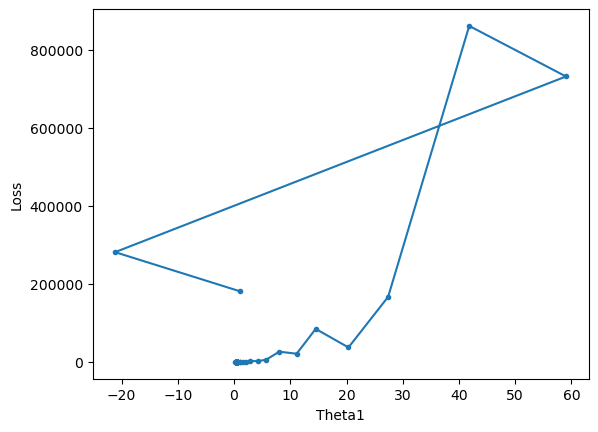

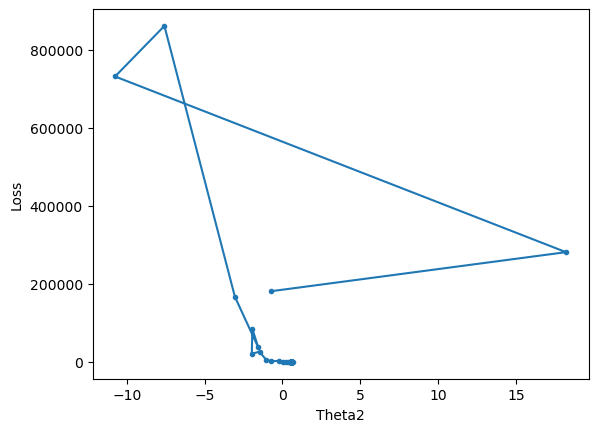

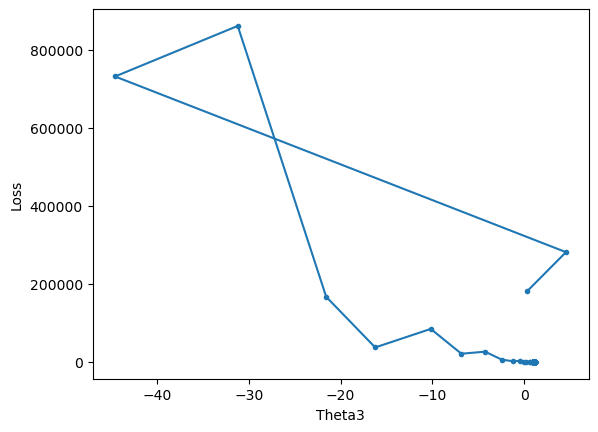

In [ ]:
for i in range(thetas.shape[1]):
    plot_thetas(loss, thetas[:,i], str(i))

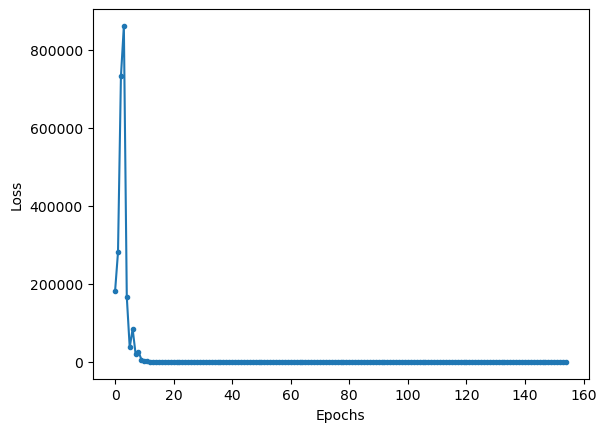

In [ ]:
plt.plot(loss, '.-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Conclusion

We can conlcude the following:
1. BFGS took fewer iterations/epochs
2. ADAM has more consistent convergence that BFGS